In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import solvers, matrix
from tqdm import tqdm

## Question 1

In [2]:
rwd_1 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,0,-10,-10,0,0,0], 
         [0,0,0,0,0,-10,-10,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0],
         [0,0,-10,-10,0,0,0,0,0,0],
         [0,0,-10,-10,0,0,0,0,0,1]])

rwd_2 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,-100,-100,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,-100,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,0,0,-100,-100,-100,0],
         [0,0,0,0,0,0,-100,0,0,0],
         [0,0,0,0,0,0,0,0,0,10]])

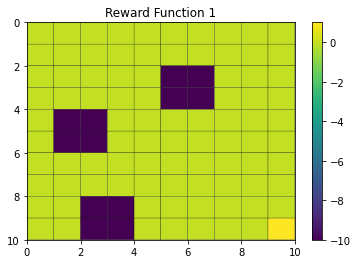

In [3]:
plt.pcolor(rwd_1,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 1")
plt.savefig('Q1a.png',dpi=300,bbox_inches='tight')
plt.show()

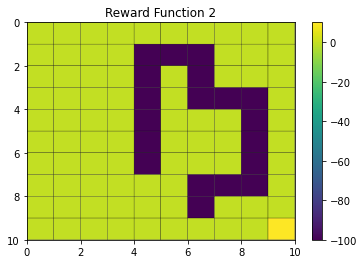

In [4]:
plt.pcolor(rwd_2,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 2")
plt.savefig('Q1b.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 2

In [5]:
state_num = np.zeros((10,10))
k=0
for i in range(0,10):
    for j in range(0,10):
        state_num[j][i]=k
        k+=1

In [6]:
def tp_calc(w):
    tp_u= np.zeros((100,100)) #Up
    tp_d= np.zeros((100,100)) #Down
    tp_l= np.zeros((100,100)) #Left
    tp_r= np.zeros((100,100)) #Right
    
    #Up
    for i in range(0,100):
        if(i%10==0):
            tp_u[i][i]+=w/4
        else:
            tp_u[i][i-1]=1-w+w/4
        if(i-10<0):
            tp_u[i][i]+=w/4
        else:
            tp_u[i][i-10]=w/4
        if(i+10>99):
            tp_u[i][i]+=w/4
        else:
            tp_u[i][i+10]=w/4
        if((i+1)%10==0):
            tp_u[i][i]+=w/4
        else:
            tp_u[i][i+1]=w/4
        if(i%10==0):                     
            tp_u[i][i]+=1-w   
        
    #Down
    for i in range(0,100):
        if(i%10==0):
            tp_d[i][i]+=w/4
        else:
            tp_d[i][i-1]=w/4
        if(i-10<0):
            tp_d[i][i]+=w/4
        else:
            tp_d[i][i-10]=w/4
        if(i+10>99):
            tp_d[i][i]+=w/4
        else:
            tp_d[i][i+10]=w/4
        if((i+1)%10==0):
            tp_d[i][i]+=w/4
        else:
            tp_d[i][i+1]=1-w+w/4
        if((i+1)%10==0):                      
            tp_d[i][i]+=1-w
    
    #Left
    for i in range(0,100):
        if(i%10==0):
            tp_l[i][i]+=w/4
        else:
            tp_l[i][i-1]=w/4
        if(i-10<0):
            tp_l[i][i]+=w/4
        else:
            tp_l[i][i-10]=1-w+w/4
        if(i+10>99):
            tp_l[i][i]+=w/4
        else:
            tp_l[i][i+10]=w/4
        if((i+1)%10==0):
            tp_l[i][i]+=w/4
        else:
            tp_l[i][i+1]=w/4
        if(i-10<0):                      
            tp_l[i][i]+=1-w
    
    #Right
    for i in range(0,100):
        if(i%10==0):
            tp_r[i][i]+=w/4
        else:
            tp_r[i][i-1]=w/4
        if(i-10<0):
            tp_r[i][i]+=w/4
        else:
            tp_r[i][i-10]=w/4
        if(i+10>99):
            tp_r[i][i]+=w/4
        else:
            tp_r[i][i+10]=1-w+w/4
        if((i+1)%10==0):
            tp_r[i][i]+=w/4
        else:
            tp_r[i][i+1]=w/4
        if(i+10>99):                      
            tp_r[i][i]+=1-w

    return tp_u, tp_d, tp_l, tp_r

In [7]:
def value_iteration(state_num,w,gamma,rwd,epsilon,tp_u, tp_d, tp_l, tp_r):
    state_val=np.zeros(100)
    delta=np.inf
    r = (rwd.T).ravel()
    N = 0
    while(delta>epsilon):
        delta=0
        old_state_val=np.copy(state_val)
        for s in range(0,100):
            u_val=np.sum(tp_u[s]*(r+gamma*old_state_val))
            d_val=np.sum(tp_d[s]*(r+gamma*old_state_val))
            l_val=np.sum(tp_l[s]*(r+gamma*old_state_val))
            r_val=np.sum(tp_r[s]*(r+gamma*old_state_val))
            state_val[s]=max(u_val,d_val,r_val,l_val)
            delta=max(delta,abs(old_state_val[s]-state_val[s]))
        N = N+1
    state_val = np.transpose(state_val.reshape(10,10))
    return state_val, N

In [8]:
w = 0.1
gamma = 0.8
epsilon = 0.01
tp_u, tp_d, tp_l, tp_r = tp_calc(w)
V_opt, N=value_iteration(state_num,w,gamma,rwd_1,epsilon,tp_r,tp_l,tp_u,tp_d)
print("Number of steps needed to converge:", N)

Number of steps needed to converge: 22


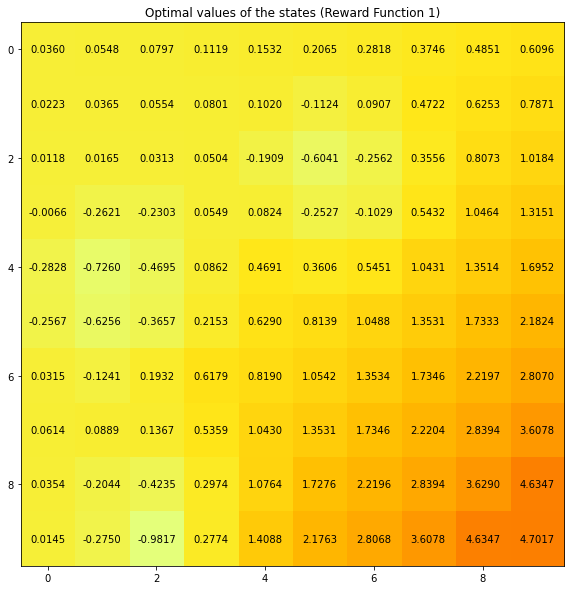

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(V_opt,cmap="Wistia")
for i in range(10):
    for j in range(10):
        c = "{:.4f}".format(V_opt[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title("Optimal values of the states (Reward Function 1)")
plt.savefig('Q2a.png',dpi=300,bbox_inches='tight')
plt.show()

In [10]:
def value_iteration_with_snapshots(state_num,w,gamma,rwd,epsilon,tp_u, tp_d, tp_l, tp_r,div):
    state_val=np.zeros(100)
    snapshot = []
    delta=np.inf
    r = (rwd.T).ravel()
    N = 0
    while(delta>epsilon):
        if((N==0) or (N==5) or (N==10) or (N==15) or (N==20)):
            cur_state_val = np.copy(state_val)
            cur_state_val = np.transpose(cur_state_val.reshape(10,10))
            snapshot.append(cur_state_val) 
        delta=0
        old_state_val=np.copy(state_val)
        for s in range(0,100):
            u_val=np.sum(tp_u[s]*(r+gamma*old_state_val))
            d_val=np.sum(tp_d[s]*(r+gamma*old_state_val))
            l_val=np.sum(tp_l[s]*(r+gamma*old_state_val))
            r_val=np.sum(tp_r[s]*(r+gamma*old_state_val))
            state_val[s]=max(u_val,d_val,r_val,l_val)
            delta=max(delta,abs(old_state_val[s]-state_val[s]))
        N = N+1
    return snapshot

In [11]:
snapshots = value_iteration_with_snapshots(state_num,w,gamma,rwd_1,epsilon,tp_r,tp_l,tp_u,tp_d,4)

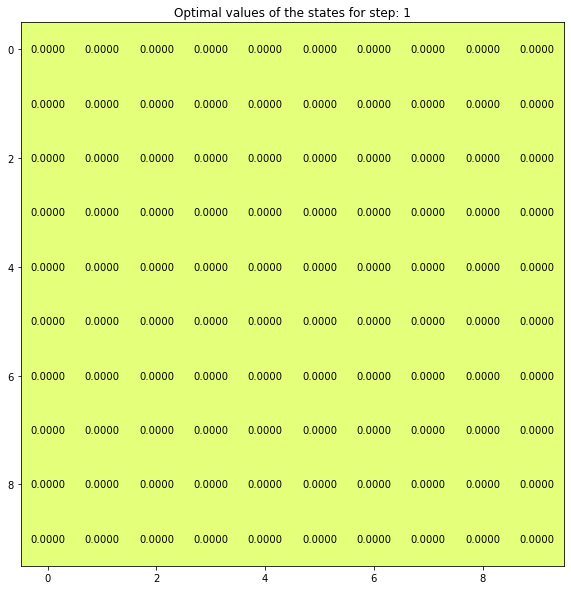

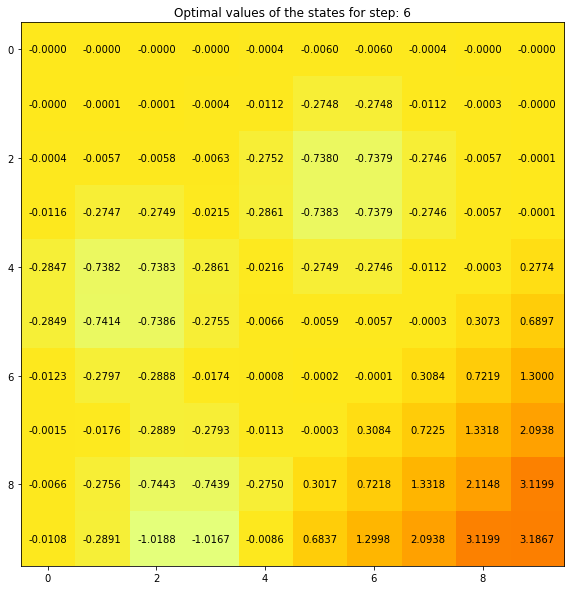

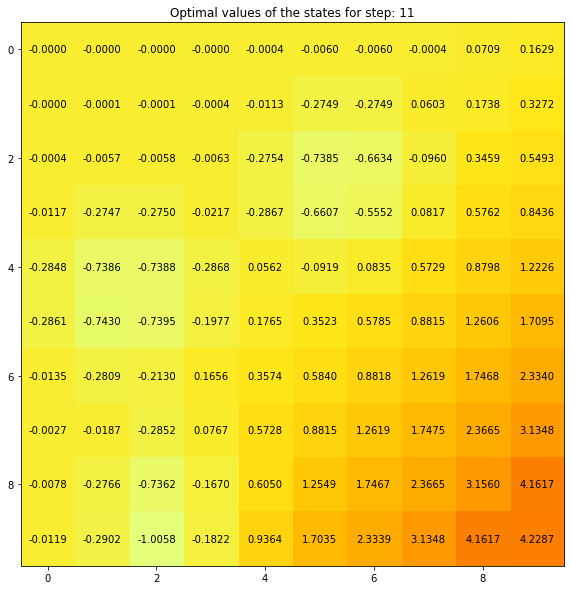

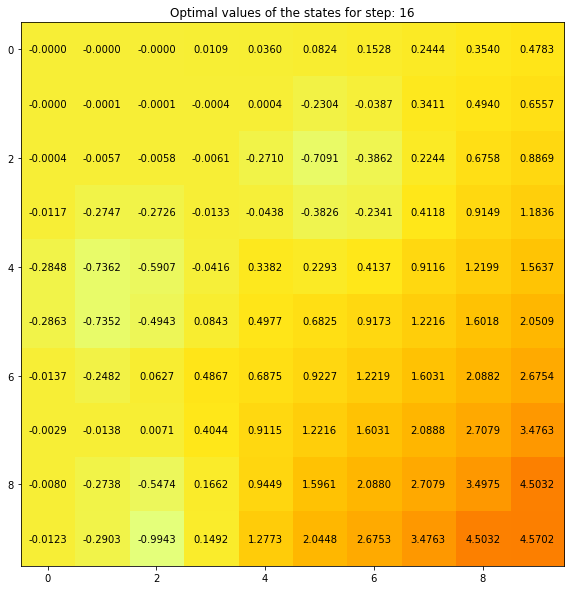

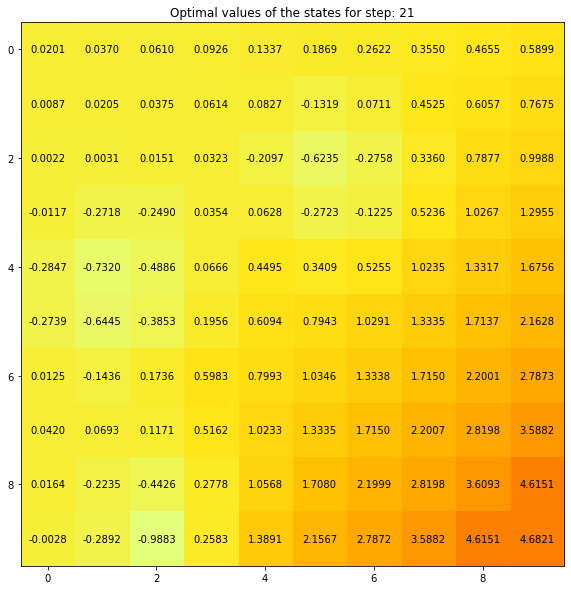

In [12]:
N = 1
for k in range(len(snapshots)):
    V = snapshots[k]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(V,cmap="Wistia")
    for i in range(10):
        for j in range(10):
            c = "{:.4f}".format(V[j,i])
            ax.text(i, j, str(c), va='center', ha='center')
    plt.title("Optimal values of the states for step: "+str(N))
    plt.savefig('Q2b'+str(N)+'.png',dpi=300,bbox_inches='tight')
    N = N+5
    plt.show()

## Question 3

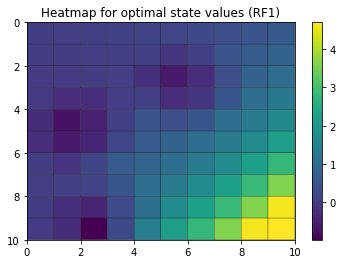

In [13]:
plt.pcolor(V_opt,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for optimal state values (RF1)")
plt.savefig('Q3a.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 5

In [14]:
def policy_iteration(state_num,w,gamma,rwd,epsilon,tp_u, tp_d, tp_l, tp_r):
    state_val=np.zeros(100)
    delta=np.inf
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (rwd.T).ravel()
    while(delta>epsilon):
        delta=0
        old_state_val=np.copy(state_val)
        for s in range(0,100):
            u_val=np.sum(tp_u[s]*(r+gamma*old_state_val))
            d_val=np.sum(tp_d[s]*(r+gamma*old_state_val))
            l_val=np.sum(tp_l[s]*(r+gamma*old_state_val))
            r_val=np.sum(tp_r[s]*(r+gamma*old_state_val))
            state_val[s]=max(u_val,d_val,r_val,l_val)
            delta=max(delta,abs(old_state_val[s]-state_val[s]))
    for s in range(0,100):
        u_val=np.sum(tp_u[s]*(r+gamma*state_val))
        d_val=np.sum(tp_d[s]*(r+gamma*state_val))
        l_val=np.sum(tp_l[s]*(r+gamma*state_val))
        r_val=np.sum(tp_r[s]*(r+gamma*state_val))
        arr=[u_val,d_val,l_val,r_val] #Up: 0, Down: 1, Left: 2, Right: 3
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    pic_arrow=np.chararray((10,10),unicode=True)
    for i in range(10):
        for j in range(10):
            if(arrows[j][i]==0.):
                pic_arrow[j][i] = u'\u2191'
            elif(arrows[j][i]==1.):
                pic_arrow[j][i] = u'\u2193'
            elif(arrows[j][i]==2.):
                pic_arrow[j][i]=u'\u2190'
            elif(arrows[j][i]==3.):
                pic_arrow[j][i] = u'\u2192'
    return policy, pic_arrow, arrows

In [15]:
policy, pic_arrow, arrows = policy_iteration(state_num,w,gamma,rwd_1,epsilon,tp_u, tp_d, tp_l, tp_r)

In [16]:
print(pic_arrow)

[['→' '→' '→' '→' '→' '→' '→' '→' '↓' '↓']
 ['→' '→' '→' '↑' '↑' '↑' '→' '→' '↓' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '→' '→' '↓' '↓']
 ['↑' '↑' '→' '↓' '↓' '↓' '↓' '→' '↓' '↓']
 ['↑' '↑' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '↓' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '→' '→' '→' '→' '→' '→' '↓' '↓' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '↓' '↓']
 ['↑' '↑' '↑' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '←' '←' '→' '→' '→' '→' '→' '→' '↓']]


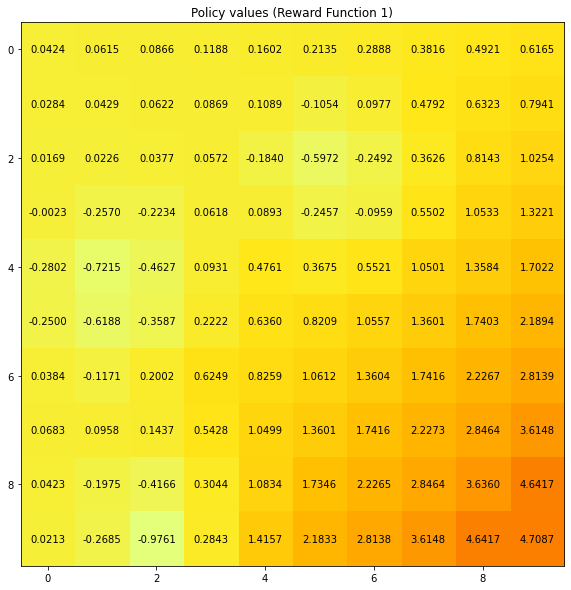

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(policy,cmap="Wistia")
for i in range(10):
    for j in range(10):
        c = "{:.4f}".format(policy[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title("Policy values (Reward Function 1)")
plt.savefig('Q5.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 6

In [18]:
V_opt, N=value_iteration(state_num,w,gamma,rwd_2,epsilon,tp_r,tp_l,tp_u,tp_d)
print("Number of steps needed to converge:", N)

Number of steps needed to converge: 32


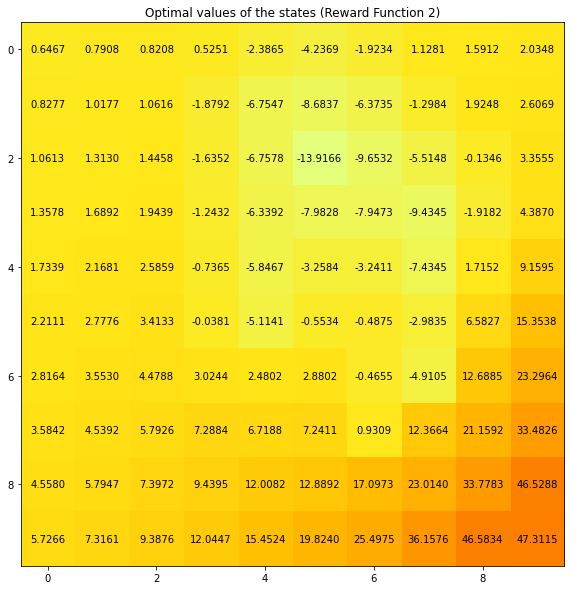

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(V_opt,cmap="Wistia")
for i in range(10):
    for j in range(10):
        c = "{:.4f}".format(V_opt[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title("Optimal values of the states (Reward Function 2)")
plt.savefig('Q6.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 7

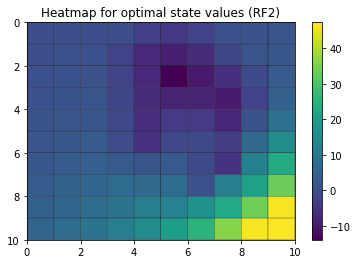

In [20]:
plt.pcolor(V_opt,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for optimal state values (RF2)")
plt.savefig('Q7.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 8

In [21]:
policy, pic_arrow, arrows = policy_iteration(state_num,w,gamma,rwd_2,epsilon,tp_u, tp_d, tp_l, tp_r)

In [22]:
print(pic_arrow)

[['↓' '↓' '↓' '←' '←' '→' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↑' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '↑' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '↓' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '←' '→' '↓']
 ['↓' '↓' '↓' '↓' '↓' '↓' '←' '←' '→' '↓']
 ['↓' '↓' '↓' '↓' '↓' '↓' '←' '↓' '↓' '↓']
 ['→' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']]


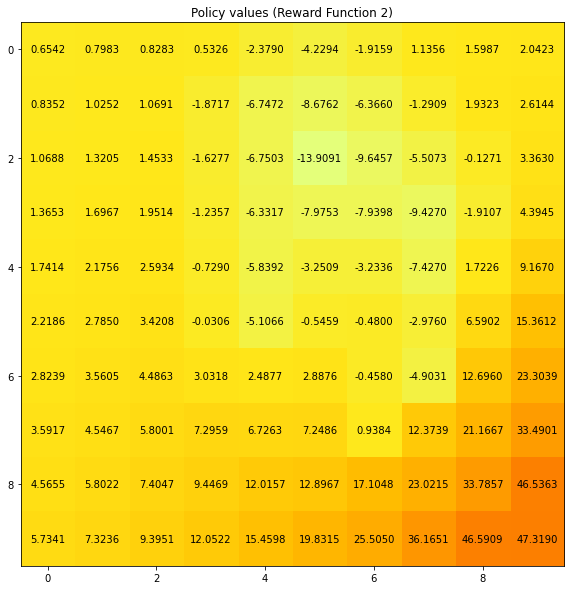

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(policy,cmap="Wistia")
for i in range(10):
    for j in range(10):
        c = "{:.4f}".format(policy[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title("Policy values (Reward Function 2)")
plt.savefig('Q8.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 9

Number of steps needed to converge: 19


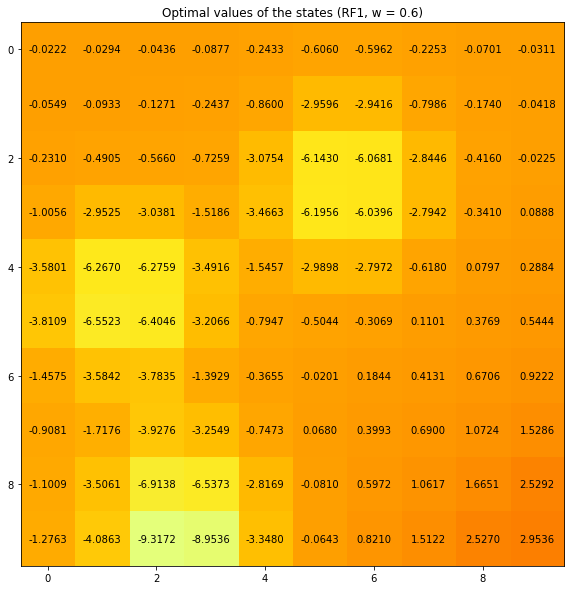

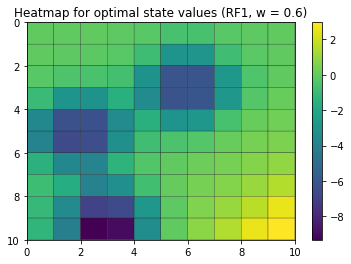

[['↑' '←' '←' '←' '←' '←' '→' '→' '→' '↑']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '←' '↑' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '←' '↓' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '↓' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '←' '→' '→' '→' '→' '→' '↓' '↓' '↓']
 ['←' '←' '←' '→' '→' '→' '→' '→' '↓' '↓']
 ['↑' '←' '←' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '←' '←' '→' '→' '→' '→' '→' '→' '↓']]


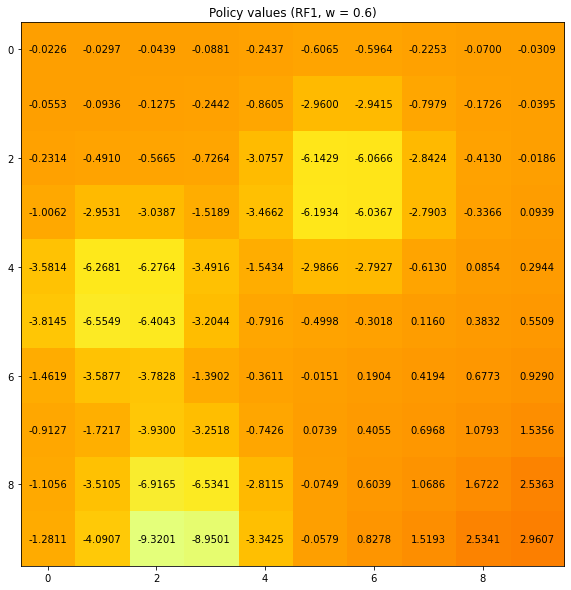

In [24]:
w = 0.6
gamma = 0.8
epsilon = 0.01
tp_u, tp_d, tp_l, tp_r = tp_calc(w)
V_opt, N=value_iteration(state_num,w,gamma,rwd_1,epsilon,tp_r,tp_l,tp_u,tp_d)
print("Number of steps needed to converge:", N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(V_opt,cmap="Wistia")
for i in range(10):
    for j in range(10):
        c = "{:.4f}".format(V_opt[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title("Optimal values of the states (RF1, w = 0.6)")
plt.savefig('Q9a.png',dpi=300,bbox_inches='tight')
plt.show()

plt.pcolor(V_opt,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for optimal state values (RF1, w = 0.6)")
plt.savefig('Q9b.png',dpi=300,bbox_inches='tight')
plt.show()

policy, pic_arrow,arrows = policy_iteration(state_num,w,gamma,rwd_1,epsilon,tp_u, tp_d, tp_l, tp_r)
print(pic_arrow)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(policy,cmap="Wistia")
for i in range(10):
    for j in range(10):
        c = "{:.4f}".format(policy[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title("Policy values (RF1, w = 0.6)")
plt.savefig('Q9c.png',dpi=300,bbox_inches='tight')
plt.show()

Number of steps needed to converge: 27


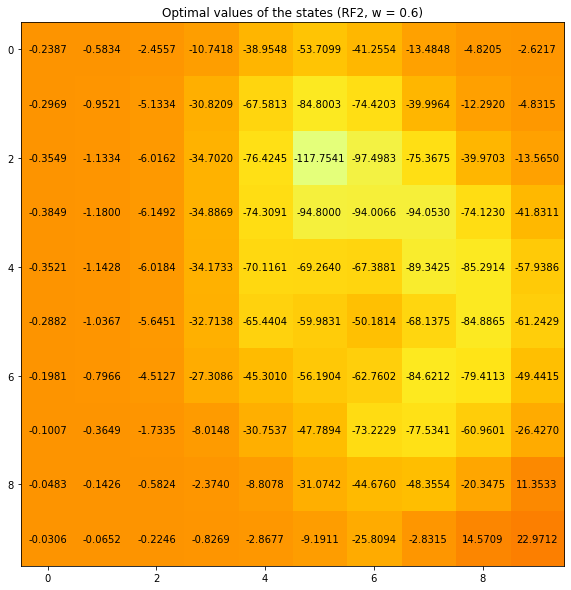

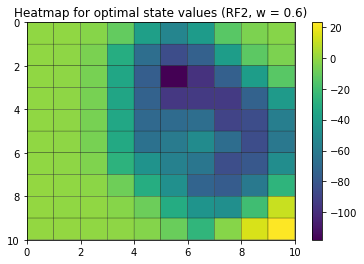

[['↑' '←' '←' '←' '←' '←' '→' '→' '→' '↑']
 ['↑' '←' '←' '←' '←' '↑' '→' '→' '↑' '↑']
 ['↑' '←' '←' '←' '←' '↓' '→' '→' '↑' '↑']
 ['↓' '←' '←' '←' '←' '↓' '↓' '↑' '↑' '↑']
 ['↓' '←' '←' '←' '←' '↓' '↓' '←' '→' '↑']
 ['↓' '←' '←' '←' '←' '→' '←' '←' '→' '↓']
 ['↓' '←' '←' '←' '←' '↓' '↑' '←' '→' '↓']
 ['↓' '←' '←' '←' '←' '←' '←' '↓' '↓' '↓']
 ['↓' '←' '←' '←' '←' '←' '↓' '↓' '↓' '↓']
 ['↓' '←' '←' '←' '←' '←' '→' '→' '→' '↓']]


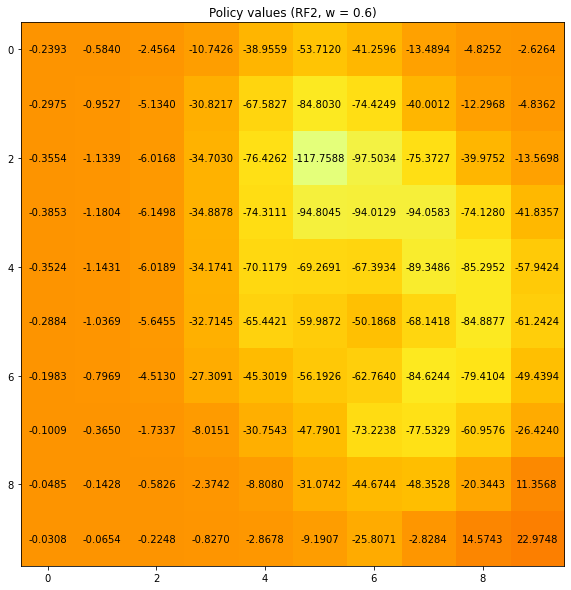

In [25]:
w = 0.6
gamma = 0.8
epsilon = 0.01
tp_u, tp_d, tp_l, tp_r = tp_calc(w)
V_opt, N=value_iteration(state_num,w,gamma,rwd_2,epsilon,tp_r,tp_l,tp_u,tp_d)
print("Number of steps needed to converge:", N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(V_opt,cmap="Wistia")
for i in range(10):
    for j in range(10):
        c = "{:.4f}".format(V_opt[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title("Optimal values of the states (RF2, w = 0.6)")
plt.savefig('Q9d.png',dpi=300,bbox_inches='tight')
plt.show()

plt.pcolor(V_opt,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for optimal state values (RF2, w = 0.6)")
plt.savefig('Q9e.png',dpi=300,bbox_inches='tight')
plt.show()

policy, pic_arrow,arrows = policy_iteration(state_num,w,gamma,rwd_2,epsilon,tp_u, tp_d, tp_l, tp_r)
print(pic_arrow)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(policy,cmap="Wistia")
for i in range(10):
    for j in range(10):
        c = "{:.4f}".format(policy[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title("Policy values (RF2, w = 0.6)")
plt.savefig('Q9f.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 11

In [26]:
def getcDbMatrices(arrows_expert,P_ss,ind,gamma,lambda_val,maximum):
    I = np.identity(100)
    mat1 = np.zeros((300,100))
    iden_mat = np.zeros((300,100))
    i=0
    for s in range(100):
        opt = int(arrows_expert[ind][s])
        for action in range(len(P_ss)):
            if(opt==action):
                continue
            pa1 = P_ss[opt]
            pa = P_ss[action]
            mat1[i,:] = np.matmul((pa1[s]-pa[s]).reshape(1,100), np.linalg.inv(I-gamma*pa1))
            iden_mat[i,s] = 1
            i=i+1
    mat1 = -mat1
    R = np.vstack((mat1, mat1,-I, I, I, -I))
    t = np.vstack((iden_mat, np.zeros((700,100))))
    u = np.vstack((np.zeros((600,100)), -I, -I, np.zeros((200,100))))
    D = np.hstack((R,t,u))
    ones = np.zeros((100,1))+1
    c = np.vstack((np.zeros((100,1)), ones, -lambda_val*ones))
    b = np.zeros((800,1))
    Rmax = np.zeros((100,1))+maximum[ind]
    b = np.vstack((b, Rmax, Rmax))
    return c,D,b

In [27]:
w = 0.1
gamma = 0.8
epsilon = 0.01
tp_u, tp_d, tp_l, tp_r = tp_calc(w)

P_ss = [tp_u, tp_d, tp_l, tp_r]

#Policies for Reward function 1 (expert)
V_opt_1, N_1=value_iteration(state_num,w,gamma,rwd_1,epsilon,tp_r,tp_l,tp_u,tp_d)
policy_1, pic_arrow_1,arrows_1 = policy_iteration(state_num,w,gamma,rwd_1,epsilon,tp_u, tp_d, tp_l, tp_r)

#Policies for Reward function 2 (expert)
V_opt_2, N_2=value_iteration(state_num,w,gamma,rwd_2,epsilon,tp_r,tp_l,tp_u,tp_d)
policy_2, pic_arrow_2,arrows_2 = policy_iteration(state_num,w,gamma,rwd_2,epsilon,tp_u, tp_d, tp_l, tp_r)

arrows_expert = [np.transpose(arrows_1).flatten(), np.transpose(arrows_2).flatten()]

In [28]:
lambdas = np.arange(0,5.01,0.01)
maximum = [1,10]
acc_list_list = []
I = np.identity(100)
ind = 0   
while(ind<2):
    acc_list = []
    for i,lambda_val in enumerate(tqdm(lambdas)):
        
        #Extract reward function
        c,D,b = getcDbMatrices(arrows_expert,P_ss,ind,gamma,lambda_val,maximum)
        solvers.options['show_progress']=False
        sol = solvers.lp(matrix(c),matrix(D),matrix(b))
        R = np.array(sol['x'][:100])
        
        #Extract agent's policy from extracted reward function
        policy_agent, pic_arrow_agent,arrows_agent = policy_iteration(state_num,w,gamma,
                                                                     R,epsilon,tp_u, tp_d, tp_l, tp_r)    
        
        #Performance measure
        acc=0
        for j in range(len(np.transpose(arrows_agent).flatten())):
            if(np.transpose(arrows_agent).flatten()[j]==arrows_expert[ind][j]):
                acc = acc+1
        acc = acc/100.0
        
        acc_list.append(acc)
    acc_list_list.append(acc_list)
    ind = ind+1

100%|██████████| 501/501 [00:38<00:00, 12.89it/s]


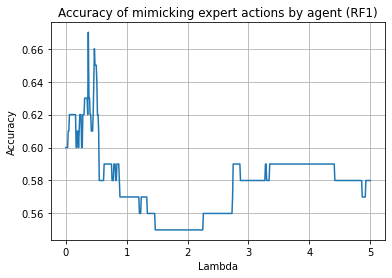

In [29]:
plt.plot(lambdas,acc_list_list[0])
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy of mimicking expert actions by agent (RF1)")
plt.grid()
plt.savefig('Q11.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 12

In [30]:
print("Max value of accuracy:",acc_list_list[0][np.argmax(acc_list_list[0])])
print("Corresponding value of lambda:",lambdas[np.argmax(acc_list_list[0])])

Max value of accuracy: 0.67
Corresponding value of lambda: 0.37


## Question 13

In [31]:
c,D,b = getcDbMatrices(arrows_expert,P_ss,0,gamma,0.37,maximum)
solvers.options['show_progress']=False
sol = solvers.lp(matrix(c),matrix(D),matrix(b))
R = np.array(sol['x'][:100])
R = np.transpose(R.reshape(10,10))

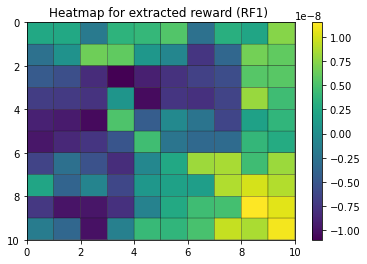

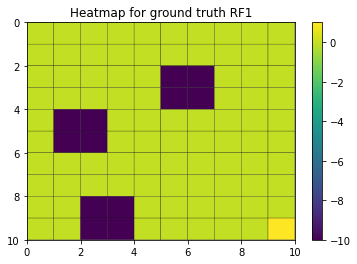

In [32]:
plt.pcolor(R,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for extracted reward (RF1) ")
plt.savefig('Q13a.png',dpi=300,bbox_inches='tight')
plt.show()

plt.pcolor(rwd_1,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for ground truth RF1")
plt.savefig('Q13b.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 14

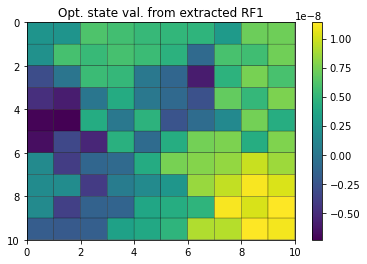

In [33]:
V_extracted, N=value_iteration(state_num,0.1,gamma,R,epsilon,tp_r,tp_l,tp_u,tp_d)
plt.pcolor(V_extracted,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Opt. state val. from extracted RF1")
plt.savefig('Q14.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 16

In [34]:
policy_agent, pic_arrow_agent,arrows_agent = policy_iteration(state_num,w,gamma,
                                                              R,epsilon,tp_u, tp_d, tp_l, tp_r)   
print(pic_arrow_agent)

[['→' '↓' '↓' '↓' '→' '↑' '←' '→' '→' '↑']
 ['→' '→' '→' '←' '←' '↑' '←' '→' '→' '↑']
 ['↑' '↑' '↑' '↑' '↑' '↑' '→' '→' '↓' '↑']
 ['↑' '↑' '→' '↓' '←' '↓' '→' '→' '↑' '←']
 ['↑' '→' '→' '↑' '←' '↓' '↓' '→' '↑' '↑']
 ['↓' '↓' '→' '↑' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '↓' '↓' '→' '→' '→' '→' '↓' '↓' '↓']
 ['←' '←' '←' '→' '→' '↑' '→' '→' '↓' '↓']
 ['↑' '↑' '↑' '→' '↓' '→' '→' '→' '→' '↓']
 ['↓' '←' '→' '→' '→' '→' '→' '→' '→' '↓']]


## Question 18

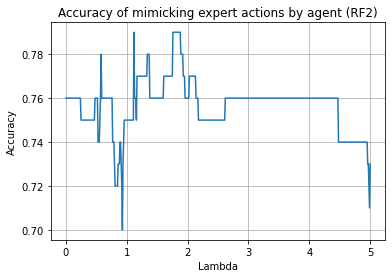

In [35]:
plt.plot(lambdas,acc_list_list[1])
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy of mimicking expert actions by agent (RF2)")
plt.grid()
plt.savefig('Q18.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 19

In [36]:
print("Max value of accuracy:",acc_list_list[1][np.argmax(acc_list_list[1])])
print("Corresponding value of lambda:",lambdas[np.argmax(acc_list_list[1])])

Max value of accuracy: 0.79
Corresponding value of lambda: 1.12


## Question 20

In [37]:
c,D,b = getcDbMatrices(arrows_expert,P_ss,1,gamma,1.12,maximum)
solvers.options['show_progress']=False
sol = solvers.lp(matrix(c),matrix(D),matrix(b))
R = np.array(sol['x'][:100])
R = np.transpose(R.reshape(10,10))

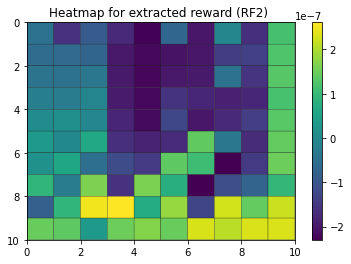

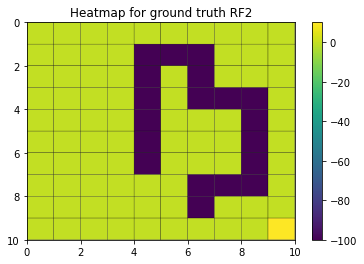

In [38]:
plt.pcolor(R,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for extracted reward (RF2) ")
plt.savefig('Q20a.png',dpi=300,bbox_inches='tight')
plt.show()

plt.pcolor(rwd_2,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for ground truth RF2")
plt.savefig('Q20b.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 21

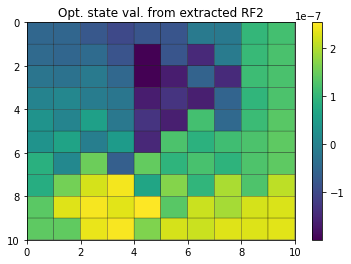

In [39]:
V_extracted, N=value_iteration(state_num,0.1,gamma,R,epsilon,tp_r,tp_l,tp_u,tp_d)
plt.pcolor(V_extracted,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Opt. state val. from extracted RF2")
plt.savefig('Q21.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 23

In [40]:
policy_agent, pic_arrow_agent,arrows_agent = policy_iteration(state_num,w,gamma,
                                                              R,epsilon,tp_u, tp_d, tp_l, tp_r)   
print(pic_arrow_agent)

[['↑' '←' '↓' '←' '→' '↑' '→' '↑' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↑' '→' '↑' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '→' '→' '→' '→' '→']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '↓' '→' '↓']
 ['↓' '↓' '↓' '←' '↓' '↓' '↓' '←' '→' '↓']
 ['↓' '↓' '↓' '←' '↓' '↓' '←' '←' '→' '↓']
 ['←' '→' '↓' '↓' '↓' '↓' '←' '↓' '↓' '↓']
 ['→' '→' '→' '←' '←' '↓' '↓' '↓' '↓' '↓']
 ['↓' '↑' '↑' '↑' '←' '→' '↓' '→' '→' '↓']]


## Question 25

In [65]:
def policy_iteration_Q25(state_num,w,gamma,rwd,epsilon,tp_u, tp_d, tp_l, tp_r):
    state_val=np.zeros(100)
    delta=np.inf
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (rwd.T).ravel()
    while(delta>epsilon):
        delta=0
        old_state_val=np.copy(state_val)
        for s in range(0,100):
            u_val=np.sum(tp_u[s]*(r+gamma*old_state_val))
            d_val=np.sum(tp_d[s]*(r+gamma*old_state_val))
            l_val=np.sum(tp_l[s]*(r+gamma*old_state_val))
            r_val=np.sum(tp_r[s]*(r+gamma*old_state_val))
            state_val[s]=max(u_val,d_val,r_val,l_val)
            delta=max(delta,abs(old_state_val[s]-state_val[s]))
    for s in range(0,100):
        u_val=np.sum(tp_u[s]*(r+gamma*state_val))
        d_val=np.sum(tp_d[s]*(r+gamma*state_val))
        l_val=np.sum(tp_l[s]*(r+gamma*state_val))
        r_val=np.sum(tp_r[s]*(r+gamma*state_val))
        
        #Set state values of edge/corners states to -infinity
        if s!=99:
            if s%10==0:
                u_val=-np.inf
            if s%10==9:
                d_val = -np.inf
            if s<=9:
                l_val=-np.inf
            if s>=90:
                r_val=-np.inf       
        
        arr=[u_val,d_val,l_val,r_val] #Up: 0, Down: 1, Left: 2, Right: 3
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    pic_arrow=np.chararray((10,10),unicode=True)
    for i in range(10):
        for j in range(10):
            if(arrows[j][i]==0.):
                pic_arrow[j][i] = u'\u2191'
            elif(arrows[j][i]==1.):
                pic_arrow[j][i] = u'\u2193'
            elif(arrows[j][i]==2.):
                pic_arrow[j][i]=u'\u2190'
            elif(arrows[j][i]==3.):
                pic_arrow[j][i] = u'\u2192'
    return policy, pic_arrow, arrows

In [66]:
w = 0.1
gamma = 0.8
epsilon = pow(10,-10)
tp_u, tp_d, tp_l, tp_r = tp_calc(w)

P_ss = [tp_u, tp_d, tp_l, tp_r]

#Policies for Reward function 1 (expert)
V_opt_1, N_1=value_iteration(state_num,w,gamma,rwd_1,epsilon,tp_r,tp_l,tp_u,tp_d)
policy_1, pic_arrow_1,arrows_1 = policy_iteration(state_num,w,gamma,rwd_1,epsilon,tp_u, tp_d, tp_l, tp_r)

#Policies for Reward function 2 (expert)
V_opt_2, N_2=value_iteration(state_num,w,gamma,rwd_2,epsilon,tp_r,tp_l,tp_u,tp_d)
policy_2, pic_arrow_2,arrows_2 = policy_iteration(state_num,w,gamma,rwd_2,epsilon,tp_u, tp_d, tp_l, tp_r)

arrows_expert = [np.transpose(arrows_1).flatten(), np.transpose(arrows_2).flatten()]

In [67]:
lambdas = np.arange(0,5.01,0.01)
maximum = [1,10]
acc_list_list = []
I = np.identity(100)
ind = 0   
while(ind<2):
    acc_list = []
    for i,lambda_val in enumerate(tqdm(lambdas)):
        
        #Extract reward function
        c,D,b = getcDbMatrices(arrows_expert,P_ss,ind,gamma,lambda_val,maximum)
        solvers.options['show_progress']=False
        sol = solvers.lp(matrix(c),matrix(D),matrix(b))
        R = np.array(sol['x'][:100])
        
        #Extract agent's policy from extracted reward function
        policy_agent, pic_arrow_agent,arrows_agent = policy_iteration_Q25(state_num,w,gamma,
                                                                     R,epsilon,tp_u, tp_d, tp_l, tp_r)    
        
        #Performance measure
        acc=0
        for j in range(len(np.transpose(arrows_agent).flatten())):
            if(np.transpose(arrows_agent).flatten()[j]==arrows_expert[ind][j]):
                acc = acc+1
        acc = acc/100.0
        
        acc_list.append(acc)
    acc_list_list.append(acc_list)
    ind = ind+1

100%|██████████| 501/501 [01:20<00:00,  6.19it/s]


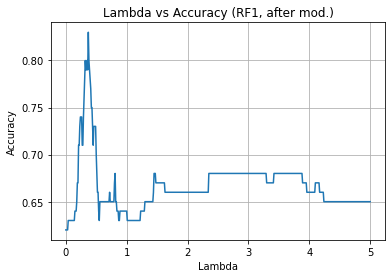

In [68]:
plt.plot(lambdas,acc_list_list[0])
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Lambda vs Accuracy (RF1, after mod.)")
plt.grid()
plt.savefig('Q25a.png',dpi=300,bbox_inches='tight')
plt.show()

In [69]:
print("Max value of accuracy:",acc_list_list[0][np.argmax(acc_list_list[0])])
print("Corresponding value of lambda:",lambdas[np.argmax(acc_list_list[0])])

Max value of accuracy: 0.83
Corresponding value of lambda: 0.37


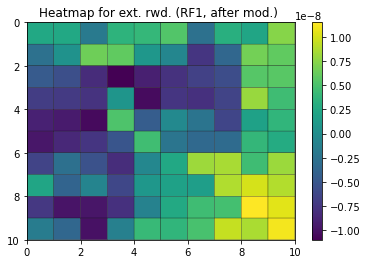

In [74]:
c,D,b = getcDbMatrices(arrows_expert,P_ss,0,gamma,0.37,maximum)
solvers.options['show_progress']=False
sol = solvers.lp(matrix(c),matrix(D),matrix(b))
R = np.array(sol['x'][:100])
R = np.transpose(R.reshape(10,10))

plt.pcolor(R,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for ext. rwd. (RF1, after mod.) ")
plt.savefig('Q25b.png',dpi=300,bbox_inches='tight')
plt.show()

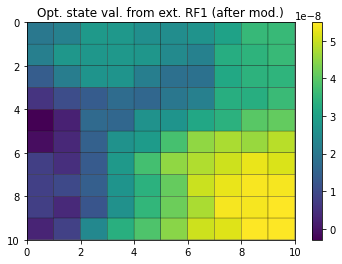

In [77]:
V_extracted, N=value_iteration(state_num,0.1,gamma,R,epsilon,tp_r,tp_l,tp_u,tp_d)
plt.pcolor(V_extracted,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Opt. state val. from ext. RF1 (after mod.)")
plt.savefig('Q25c.png',dpi=300,bbox_inches='tight')
plt.show()

In [75]:
policy_agent, pic_arrow_agent,arrows_agent = policy_iteration_Q25(state_num,w,gamma,
                                                              R,epsilon,tp_u, tp_d, tp_l, tp_r)   
print(pic_arrow_agent)

[['→' '↓' '↓' '↓' '←' '←' '→' '→' '→' '↓']
 ['→' '→' '→' '←' '←' '↑' '→' '→' '→' '↑']
 ['↑' '↑' '↑' '↑' '↑' '↑' '→' '→' '↓' '↑']
 ['↑' '↑' '→' '↓' '↓' '↓' '↓' '→' '↓' '↓']
 ['↑' '→' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '→' '→' '→' '↓' '↓' '↓' '↓' '↓' '↓']
 ['↓' '→' '→' '→' '→' '→' '→' '↓' '↓' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '↓' '↓']
 ['↑' '↑' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']]


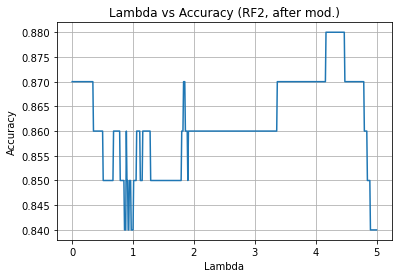

In [78]:
plt.plot(lambdas,acc_list_list[1])
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Lambda vs Accuracy (RF2, after mod.)")
plt.grid()
plt.savefig('Q25d.png',dpi=300,bbox_inches='tight')
plt.show()

In [79]:
print("Max value of accuracy:",acc_list_list[1][np.argmax(acc_list_list[1])])
print("Corresponding value of lambda:",lambdas[np.argmax(acc_list_list[1])])

Max value of accuracy: 0.88
Corresponding value of lambda: 4.17


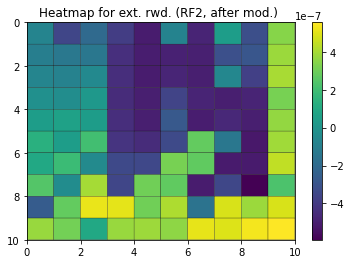

In [80]:
c,D,b = getcDbMatrices(arrows_expert,P_ss,1,gamma,4.17,maximum)
solvers.options['show_progress']=False
sol = solvers.lp(matrix(c),matrix(D),matrix(b))
R = np.array(sol['x'][:100])
R = np.transpose(R.reshape(10,10))

plt.pcolor(R,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for ext. rwd. (RF2, after mod.) ")
plt.savefig('Q25e.png',dpi=300,bbox_inches='tight')
plt.show()

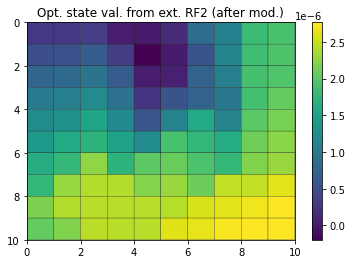

In [81]:
V_extracted, N=value_iteration(state_num,0.1,gamma,R,epsilon,tp_r,tp_l,tp_u,tp_d)
plt.pcolor(V_extracted,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Opt. state val. from ext. RF2 (after mod.)")
plt.savefig('Q25f.png',dpi=300,bbox_inches='tight')
plt.show()

In [82]:
policy_agent, pic_arrow_agent,arrows_agent = policy_iteration_Q25(state_num,w,gamma,
                                                              R,epsilon,tp_u, tp_d, tp_l, tp_r)   
print(pic_arrow_agent)

[['↓' '↓' '↓' '←' '→' '→' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↑' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '→' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '←' '↓' '↓' '→' '→' '↓']
 ['↓' '↓' '↓' '←' '→' '↓' '↓' '↓' '→' '↓']
 ['↓' '↓' '↓' '←' '↓' '↓' '↓' '←' '→' '↓']
 ['↓' '↓' '↓' '←' '↓' '↓' '←' '←' '→' '↓']
 ['→' '→' '↓' '↓' '↓' '↓' '←' '↓' '↓' '↓']
 ['→' '→' '→' '←' '←' '↓' '↓' '↓' '↓' '↓']
 ['→' '↑' '↑' '↑' '→' '→' '→' '→' '→' '↓']]
